In [307]:
# Primary Mission 
# importing the dataset 

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

data = pd.read_csv('Magnum dataset.csv')


# replacing all missing values for hometesterclub with 0 since the retailer is specifically dedicated for reviews 
data.loc[data['retailer'].str.lower() == 'hometesterclub', 'product_price'] = 0



# showing the rows where there is missing data
data[data['product_price'].isna()][['product_name', 'retailer', 'product_price']]

# filling in the remaining missing values 
data.loc[data['product_name'] == 'Magnum Classic', 'product_price'] = 3.5
data.loc[data['product_name'] == 'Magnum Minis Cookie Mania Ice Cream Sticks', 'product_price'] = 5
data.loc[data['product_name'] == 'Magnum Almond Ice Cream Stick', 'product_price'] = 2.5
data.loc[data['product_name'] == 'Magnum Intense Dark', 'product_price'] = 3.5
data.loc[data['product_name'] == 'Magnum White Chocolate Ice Cream Stick', 'product_price'] = 2.5
data.loc[data['product_name'] == 'Magnum Double Gold Caramel Billionaire Ice Cream Sticks', 'product_price'] = 5
data.loc[data['product_name'] == 'Magnum Vegan Raspberry Swirl', 'product_price'] = 2.5
data.loc[data['product_name'] == 'Magnum Salted Caramel', 'product_price'] = 3.5
data.loc[data['product_name'] == 'Magnum Mint Ice Cream Sticks', 'product_price'] = 3.5
data.loc[data['product_name'] == 'Magnum Vegan Sea Salt Caramel Ice Creams', 'product_price'] = 4.45

data.loc[data['review_title'].isna(), 'review_title'] = data['review_body'].str.split().str[:3].str.join('')

data.isna().sum()


retailer              0
product_brand         0
product_name          0
product_price         0
product_url           0
review_star_rating    0
time_of_review        0
review_title          0
review_body           0
promotional_review    0
dtype: int64

Starchaser – Average rating:  4.71, Mode rating: 5
Sunlover – Average rating:  4.11, Mode rating: 5
Other flavour – Average rating:  4.46, Mode rating: 5


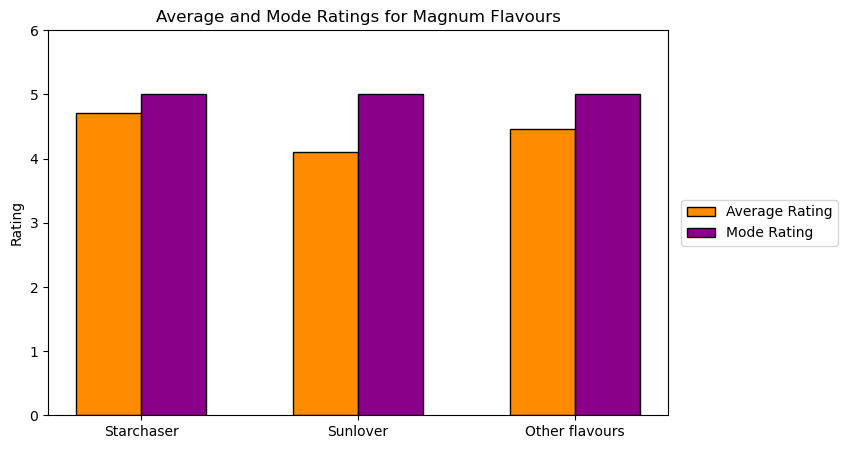

In [310]:
# Are you a Sunrise or Sunset ice cream lover?
# Perform a “consumer feedback analysis” on the Starchaser and Sunlover flavours:

# 1. Did consumers like the new flavours?
# let's start by creating a new dataset to include just the rows for starchaser and sunlover ice creams
sunrise_sunset = data[data['product_name'].str.contains('Sunlover', case = False, na = False) | data['product_name'].str.contains(
    'Starchaser', case = False, na = False)]
sunrise_sunset

# we'll calculate the average and mode for each falvour 
starchaser_rating = sunrise_sunset[sunrise_sunset['product_name'].str.contains('Starchaser', case = False)]['review_star_rating']
starchaser_mean = starchaser_rating.mean()
starchaser_mode = starchaser_rating.mode()[0]
print(f'Starchaser – Average rating: {starchaser_mean: .2f}, Mode rating: {starchaser_mode}')

sunlover_rating = sunrise_sunset[sunrise_sunset['product_name'].str.contains('Sunlover', case = False)]['review_star_rating']
sunlover_mean = sunlover_rating.mean()
sunlover_mode = sunlover_rating.mode()[0]
print(f'Sunlover – Average rating: {sunlover_mean: .2f}, Mode rating: {sunlover_mode}')

other_flavours = data[~data['product_name'].str.contains('Starchaser | Sunlover', case = False)]
other_mean = other_flavours['review_star_rating'].mean()
other_mode = other_flavours['review_star_rating'].mode()[0]
print(f'Other flavour – Average rating: {other_mean: .2f}, Mode rating: {other_mode}')

flavours = ['Starchaser', 'Sunlover', 'Other flavours']
mean_ratings = [starchaser_mean, sunlover_mean, other_mean]
mode_ratings = [starchaser_mode, sunlover_mode, other_mode]
x = range(len(flavours))

plt.figure(figsize = (8,5))
plt.bar([i-0.15 for i in x], mean_ratings, width = 0.3, label = 'Average Rating', color = 'darkorange', edgecolor = 'black')
plt.bar([i+0.15 for i in x], mode_ratings, width = 0.3, label = 'Mode Rating', color = 'darkmagenta', edgecolor = 'black')
plt.xticks(x, flavours)
plt.ylabel('Rating')
plt.ylim(0,6)
plt.title ('Average and Mode Ratings for Magnum Flavours')
plt.legend(loc = 'center left', bbox_to_anchor = (1.01, 0.5))
plt.savefig('starchaser_sunlover_vs_others.png', dpi = 300, bbox_inches = 'tight')
plt.show()


                                 Average Rating  Mode Rating
comparison_keyword                                          
Almond                                 4.553420            5
Classic                                4.550778            5
Classic Chocolate                      4.695652            5
Double Caramel                         4.482456            5
Double Gold Caramel Billionaire        4.345000            5
Double Raspberry                       4.381418            5
Double Salted Caramel                  4.278788            5
Mint                                   4.625243            5
Vegan Almond                           4.674044            5
Vegan Classic                          4.500000            5
White Chocolate                        4.436237            5 



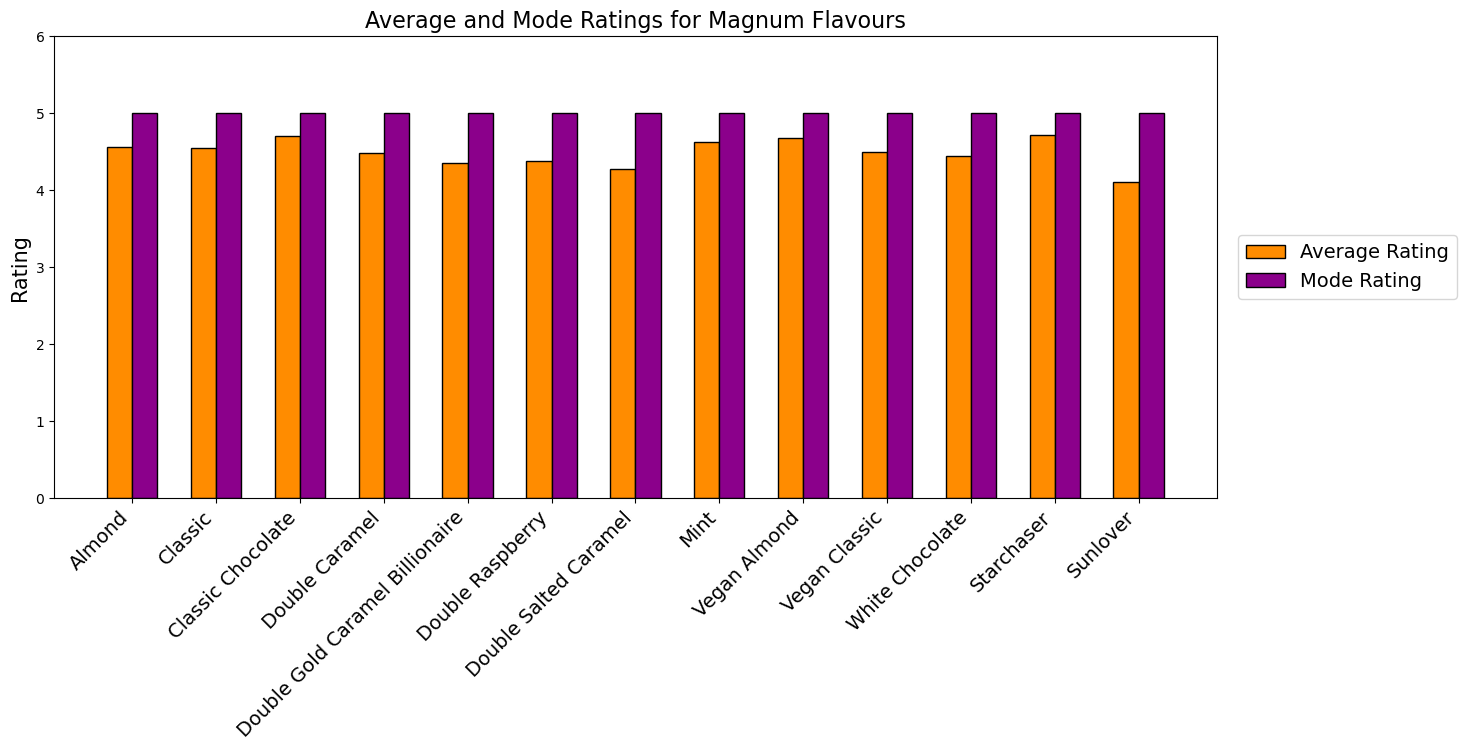

In [287]:
# 2. How do they compare with other flavours?
comparison_keywords = ['white chocolate', 'double salted caramel', 'vegan classic', 'vegan almond', 
                       'double gold caramel billionaire', 'almond', 'mint', 'classic chocolate', 'classic', 'double caramel',
                      'double raspberry']
def map_keyword(product_name):
    for kw in comparison_keywords:
        if kw in product_name.lower():
            return kw.title()
    return None

comparison_data = comparison_data.copy()
comparison_data['comparison_keyword'] = comparison_data['product_name'].apply(map_keyword)
rating_summary = comparison_data.groupby('comparison_keyword')['review_star_rating'].agg(['mean', lambda x: x.mode()[0]])
rating_summary.rename(columns = {'mean': 'Average Rating', '<lambda_0>': 'Mode Rating'}, inplace = True)
print(rating_summary, '\n')

#plot for all flavours 
flavours = list(rating_summary.index) + ['Starchaser', 'Sunlover']
mean_ratings = list(rating_summary['Average Rating']) + [starchaser_mean, sunlover_mean]
mode_ratings = list(rating_summary['Mode Rating']) + [starchaser_mode, sunlover_mode]
x = range(len(flavours))
plt.figure(figsize = (15, 6))
plt.bar([i-0.15 for i in x], mean_ratings, width = 0.3, label = 'Average Rating', color = 'darkorange', edgecolor = 'black')
plt.bar([i+0.15 for i in x], mode_ratings, width = 0.3, label = 'Mode Rating', color = 'darkmagenta', edgecolor = 'black')
plt.xticks(x, flavours, rotation = 45, ha = 'right', fontsize = 14)
plt.ylabel('Rating', fontsize = 15)
plt.ylim(0,6)
plt.title ('Average and Mode Ratings for Magnum Flavours', fontsize = 16)
plt.legend(loc = 'center left', bbox_to_anchor = (1.01, 0.5), fontsize = 14)
#plt.tight_layout()
plt.savefig('ss_comparison_with_other_flavours.png', dpi = 300, bbox_inches = 'tight')
plt.show()

Starchaser top words: [('cream', 86), ('promotion', 59), ('chocolate', 59), ('popcorn', 50), ('flavour', 45), ('caramel', 44), ('delicious', 41), ('tub', 38), ('taste', 31), ('great', 29), ('absolutely', 29), ('nice', 26), ('treat', 26), ('try', 24), ('again', 24), ('recommend', 24), ('definitely', 23), ('good', 22), ('flavours', 22), ('best', 21)] 

Sunlover top words: [('mango', 111), ('coconut', 111), ('chocolate', 93), ('cream', 76), ('white', 72), ('promotion', 60), ('taste', 60), ('flavour', 57), ('delicious', 51), ('love', 48), ('creamy', 46), ('flavours', 45), ('definitely', 38), ('nice', 34), ('sweet', 29), ('buy', 29), ('will', 29), ('treat', 29), ('again', 27), ('new', 26)]




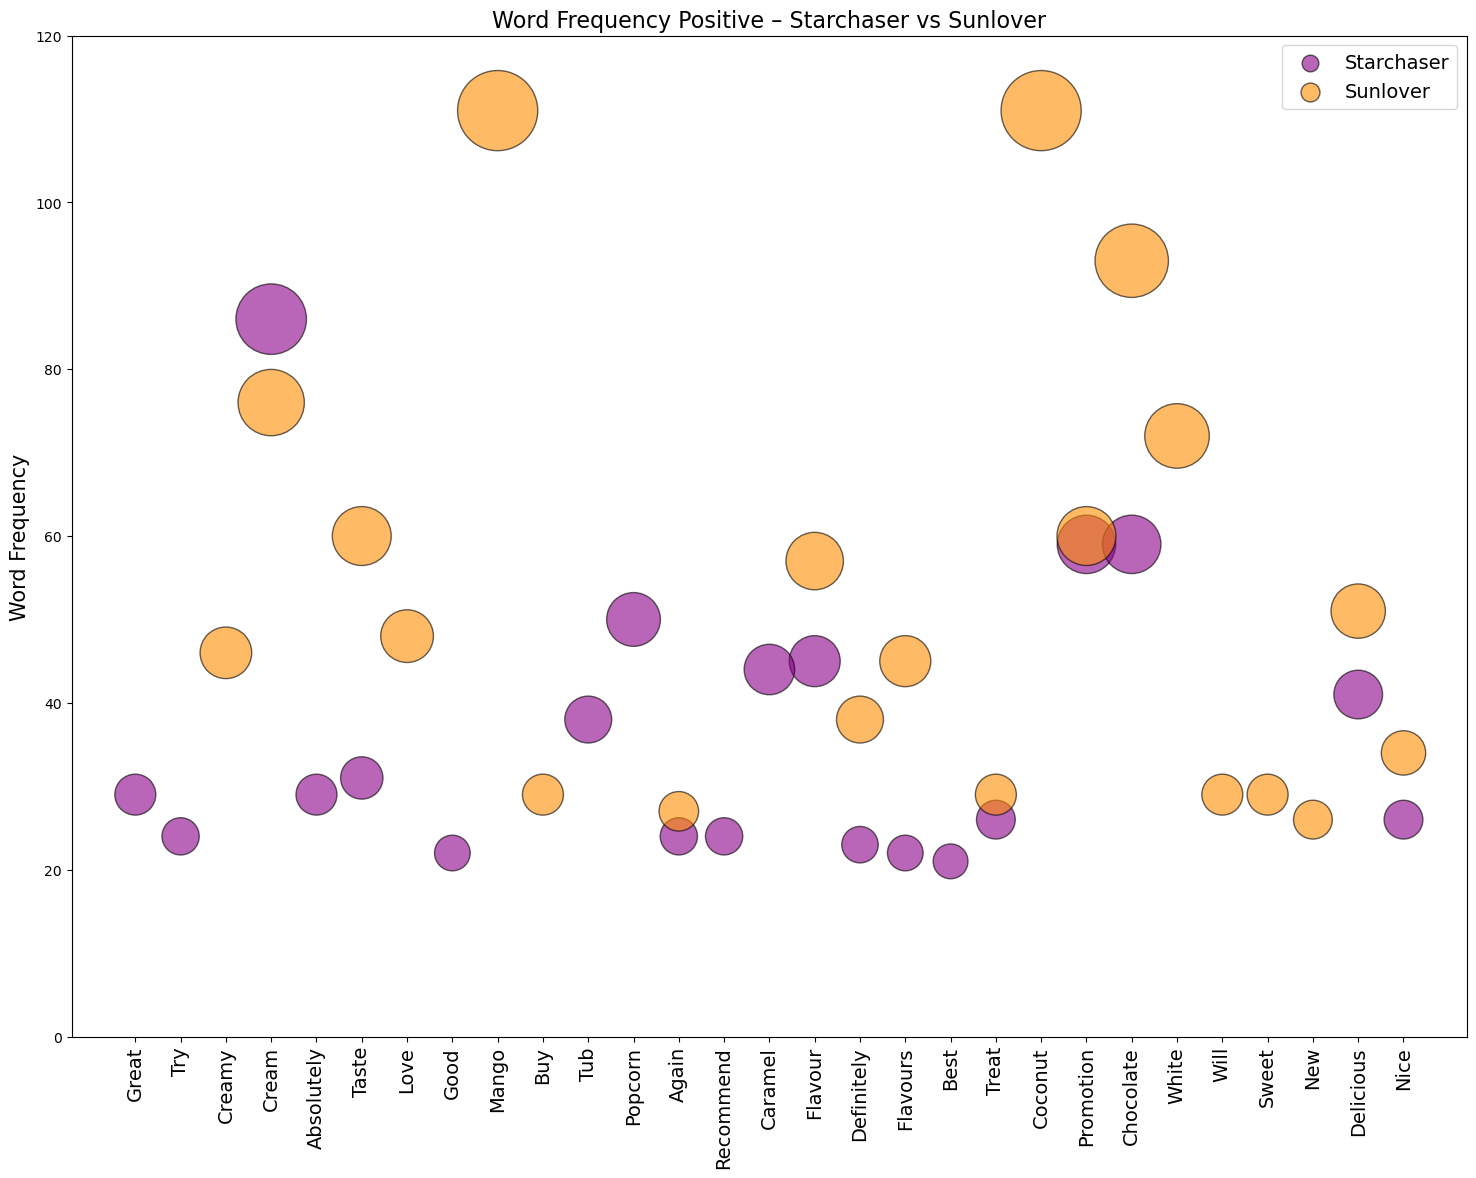

In [289]:
# 3. Are there any patterns as to why they liked them?

from collections import Counter
import re

def get_top_words(review_body, top_n = 20):
    all_text = ' '.join(review_body).lower()
    words = re.findall(r'\b\w+\b', all_text)
    stopwords = set(['the', 'and', 'a', 'is', 'it', 'i', 'to', 'of', 'in', 'for', 'on', 'with', 'this', 'that', 'my',
                    'as', 'was', 'but', 'so', 'at', 'had', 'they', 'from', 'you', 'ice', 'are', 'not', 'these', 'review', 'them',
                    'really', 'very', 'like', 'magnum', 'have', 'be', 'would', 'just', 'äôt', 'too', 's', 'part', 'collected',
                    'one'])
    filtered_words = [w for w in words if w not in stopwords]
    word_counts = Counter(filtered_words)
    return word_counts.most_common(top_n)

starchaser_reviews = sunrise_sunset[sunrise_sunset['product_name'].str.contains('Starchaser', case = False)]['review_body']
starchaser_top_words = get_top_words(starchaser_reviews)
print('Starchaser top words:', starchaser_top_words, '\n')

sunlover_reviews = sunrise_sunset[sunrise_sunset['product_name'].str.contains('Sunlover', case = False)]['review_body']
sunlover_top_words = get_top_words(sunlover_reviews)
print('Sunlover top words:', sunlover_top_words)
print('\n')

starchaser_words, starchaser_counts = zip (*starchaser_top_words)
sunlover_words, sunlover_counts = zip (*sunlover_top_words)
all_words = list(set(starchaser_words) | set(sunlover_words))
word_pos = {word: i for i, word in enumerate(all_words)}

x_starchaser = [word_pos[w] for w in starchaser_words]
y_starchaser = starchaser_counts
size_starchaser = [c * 30 for c in starchaser_counts]

x_sunlover = [word_pos[w] for w in sunlover_words]
y_sunlover = sunlover_counts
size_sunlover = [c * 30 for c in sunlover_counts]

plt.figure(figsize = (18,13))
plt.scatter(x_starchaser, y_starchaser, s = size_starchaser, color = 'darkmagenta', alpha = 0.6, label = 'Starchaser', edgecolors = 'black')
plt.scatter(x_sunlover, y_sunlover, s = size_sunlover, color = 'darkorange', alpha = 0.6, label = 'Sunlover', edgecolors = 'black')
capitalized_words = [w.title() for w in all_words]
plt.xticks(range(len(all_words)), capitalized_words, rotation = 90, fontsize = 14)
plt.ylabel('Word Frequency', fontsize = 15)
plt.ylim(0, 120)
plt.title('Word Frequency Positive – Starchaser vs Sunlover', fontsize = 16)
plt.legend(markerscale = 0.3, fontsize = 14)
plt.savefig('bubble_chart_pos_frequency.png', dpi = 300, bbox_inches = 'tight')
plt.show()


Starchaser top disliked words: [('cream', 3), ('real', 1), ('melt', 1), ('normal', 1), ('threw', 1), ('rest', 1), ('marshmallow', 1), ('full', 1), ('air', 1), ('again', 1), ('powdered', 1), ('milk', 1), ('stick', 1), ('dazs', 1), ('disliked', 1), ('tasted', 1), ('quite', 1), ('bitter', 1), ('seemed', 1), ('äògloopy', 1)] 

Sunlover top disliked words: [('mango', 22), ('coconut', 15), ('taste', 12), ('flavours', 10), ('white', 9), ('sweet', 8), ('flavour', 6), ('chocolate', 6), ('stick', 6), ('sickly', 5), ('tasted', 4), ('work', 4), ('cream', 4), ('artificial', 4), ('coating', 3), ('disappointed', 3), ('sauce', 3), ('sharp', 3), ('fake', 3), ('disappointing', 3)] 



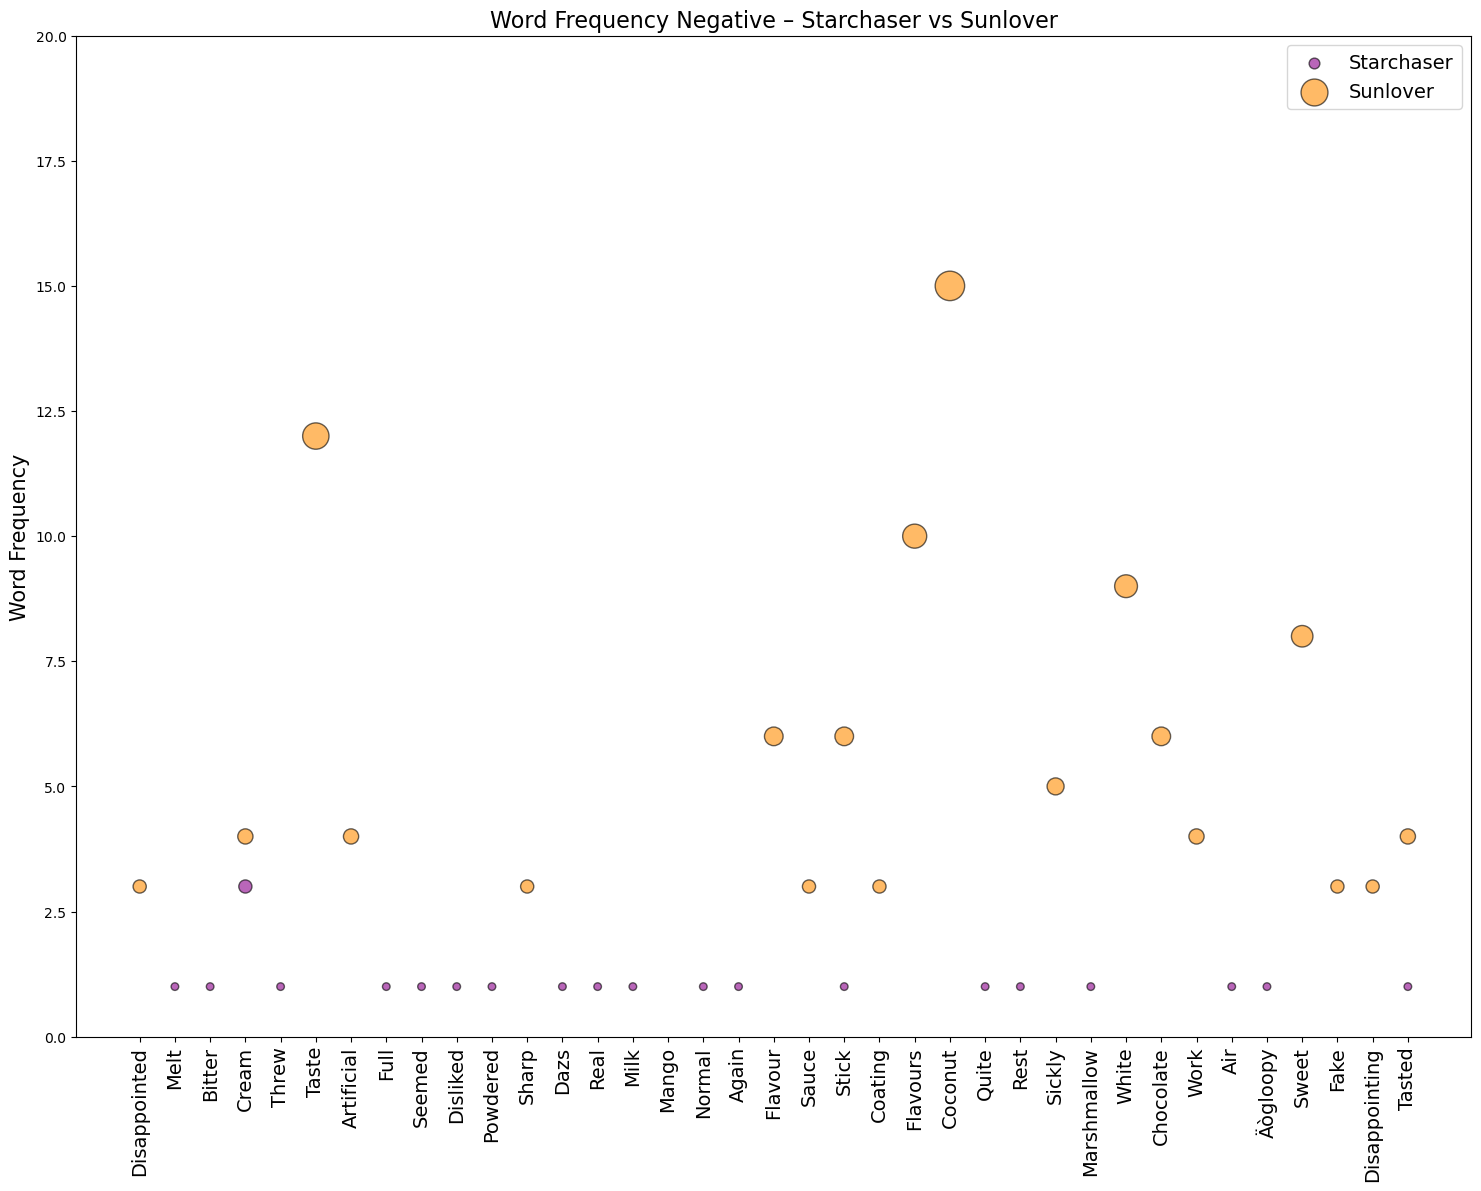

In [291]:
# why they disliked them?

def get_top_words(review_body, top_n = 20):
    all_text = ' '.join(review_body).lower()
    words = re.findall(r'\b\w+\b', all_text)
    stopwords = set(['the', 'and', 'a', 'is', 'it', 'i', 'to', 'of', 'in', 'for', 'on', 'with', 'this', 'that', 'my',
                    'as', 'was', 'but', 'so', 'at', 'had', 'they', 'from', 'you', 'ice', 'are', 'not', 'these', 'review', 'them',
                    'really', 'very', 'like', 'magnum', 'have', 'be', 'would', 'just', 'äôt', 'too', 's', 'part', 'collected',
                    'one', 'away', 'love', 'only', 'h', 'together', 'im', 'should', 'however', 'something', 'product',
                    'agen', 'nice', 'great', 'no', 'all', 't', 'both', 'bit', 'don', 'go', 'day', 'using', 'does',
                    'next', 'must', 'never'])
    filtered_words = [w for w in words if w not in stopwords]
    word_counts = Counter(filtered_words)
    return word_counts.most_common(top_n)

negative_threshold = 2
starchaser_disliked_reviews = sunrise_sunset[(sunrise_sunset['product_name'].str.contains('Starchaser', case = False, na = False)) & 
    (sunrise_sunset['review_star_rating'] <= negative_threshold)]['review_body'].dropna()
sunlover_disliked_reviews = sunrise_sunset[(sunrise_sunset['product_name'].str.contains('Sunlover', case = False, na = False)) & 
    (sunrise_sunset['review_star_rating'] <= negative_threshold)]['review_body'].dropna()

def safe_get_top_words(series, top_n = 20):
    if series.empty:
        return []
    return get_top_words(series, top_n = top_n)

starchaser_top_disliked = safe_get_top_words(starchaser_disliked_reviews, top_n = 20)
sunlover_top_disliked = safe_get_top_words(sunlover_disliked_reviews, top_n = 20)

if starchaser_top_disliked:
    starchaser_words, starchaser_counts = zip(*starchaser_top_disliked)
else:
    starchaser_words, starchaser_counts = [],[]

if sunlover_top_disliked:
    sunlover_words, sunlover_counts = zip(*sunlover_top_disliked)
else:
    sunlover_words, sunlover_counts = [],[]

all_words = list(set(starchaser_words) | set(sunlover_words))
word_pos = {word: i for i, word in enumerate(all_words)}

print("Starchaser top disliked words:", starchaser_top_disliked, '\n')
print("Sunlover top disliked words:", sunlover_top_disliked, '\n')

x_starchaser = [word_pos[w] for w in starchaser_words]
y_starchaser = starchaser_counts
size_starchaser = [c * 30 for c in starchaser_counts]

x_sunlover = [word_pos[w] for w in sunlover_words]
y_sunlover = sunlover_counts
size_sunlover = [c * 30 for c in sunlover_counts]

plt.figure(figsize = (18,13))
plt.scatter(x_starchaser, y_starchaser, s = size_starchaser, color = 'darkmagenta', alpha = 0.6, label = 'Starchaser', edgecolors = 'black')
plt.scatter(x_sunlover, y_sunlover, s = size_sunlover, color = 'darkorange', alpha = 0.6, label = 'Sunlover', edgecolors = 'black')
capitalized_words = [w.title() for w in all_words]
plt.xticks(range(len(all_words)), capitalized_words, rotation = 90, fontsize = 14)
plt.ylabel('Word Frequency', fontsize = 15)
plt.ylim(0, 20)
plt.title('Word Frequency Negative – Starchaser vs Sunlover', fontsize = 16)
plt.legend(markerscale = 1, fontsize = 14)
plt.savefig('bubble_chart_neg_frequency.png', dpi = 300, bbox_inches = 'tight')
plt.show()


       promo_group  mean_rating  mode_rating
0  Non-promotional     4.368984            5
1      Promotional     4.671243            5 



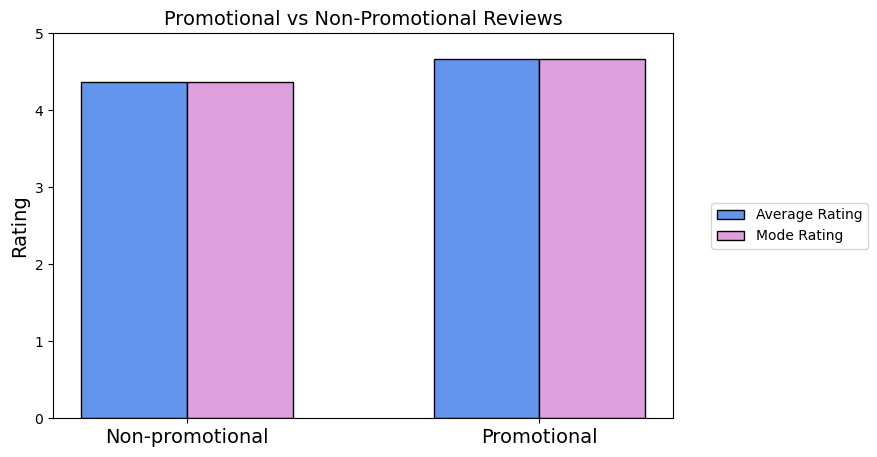

In [295]:
# Secondary mission
#1. promotional vs normal reviews – are reviews part of the promotional campaign biased? – general

promo_data = data.copy()
promo_data['promo_group'] = promo_data['promotional_review'].apply(lambda x: 'Promotional' if x else 'Non-promotional')
promo_summary = promo_data.groupby('promo_group')['review_star_rating'].agg(mean_rating = 'mean',
                                                                            mode_rating = lambda x: x.mode().iloc[0]).reset_index()
print(promo_summary, '\n')

labels = promo_summary['promo_group']
means = promo_summary['mean_rating']
modes = promo_summary['mode_rating']

x = range(len(labels))
plt.figure(figsize = (8,5))
plt.bar([i-0.15 for i in x], means, width = 0.3, label = 'Average Rating', color = 'cornflowerblue', edgecolor = 'black')
plt.bar([i+0.15 for i in x], means, width = 0.3, label = 'Mode Rating', color = 'plum', edgecolor = 'black')
plt.xticks(x, labels, fontsize = 14)
plt.ylabel('Rating', fontsize = 14)
plt.title('Promotional vs Non-Promotional Reviews', fontsize = 14)
plt.ylim(0,5)
plt.legend(fontsize = 10, loc = 'center left', bbox_to_anchor = (1.05, 0.5))
plt.savefig('promotional_vs_nonp.png', dpi = 300, bbox_inches = 'tight')
plt.show()



       promo_group  mean_rating  mode_rating
0  Non-promotional     4.088542            5
1      Promotional     4.746154            5 



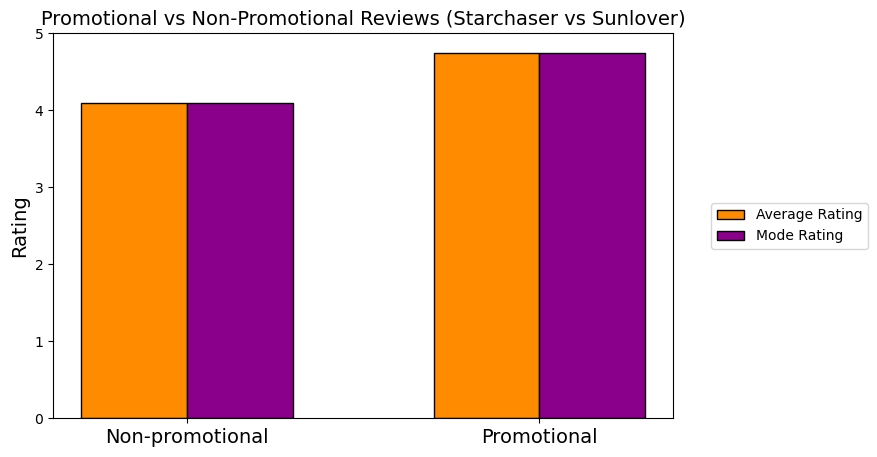

In [296]:
# Secondary mission
#1. promotional vs normal reviews – are reviews part of the promotional campaign biased? – starchaser vs sunlover

promo_data_ss = sunrise_sunset.copy()
promo_data_ss['promo_group'] = promo_data_ss['promotional_review'].apply(lambda x: 'Promotional' if x else 'Non-promotional')
promo_summary_ss = promo_data_ss.groupby('promo_group')['review_star_rating'].agg(mean_rating = 'mean',
                                                                            mode_rating = lambda x: x.mode().iloc[0]).reset_index()
print(promo_summary_ss, '\n')

labels = promo_summary_ss['promo_group']
means = promo_summary_ss['mean_rating']
modes = promo_summary_ss['mode_rating']

x = range(len(labels))
plt.figure(figsize = (8,5))
plt.bar([i-0.15 for i in x], means, width = 0.3, label = 'Average Rating', color = 'darkorange', edgecolor = 'black')
plt.bar([i+0.15 for i in x], means, width = 0.3, label = 'Mode Rating', color = 'darkmagenta', edgecolor = 'black')
plt.xticks(x, labels, fontsize = 14)
plt.ylabel('Rating', fontsize = 14)
plt.title('Promotional vs Non-Promotional Reviews (Starchaser vs Sunlover)', fontsize = 14)
plt.ylim(0,5)
plt.legend(fontsize = 10, loc = 'center left', bbox_to_anchor = (1.05, 0.5))
plt.savefig('promotional_vs_nonp_ss.png', dpi = 300, bbox_inches = 'tight')
plt.show()



  pack_size  mean_rating  mode_rating
0         3     4.375908            5
1         4     4.643599            5
2         6     4.698134            5
3        12     2.977778            3
4       Tub     4.471014            5 



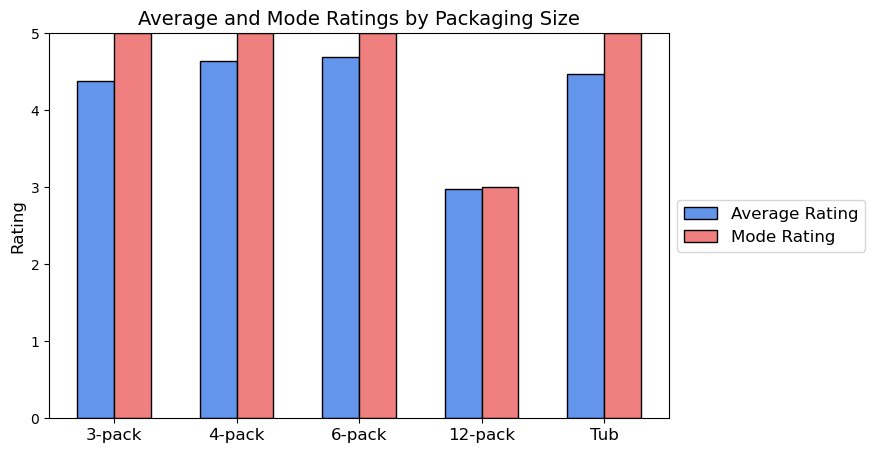

In [300]:
# 2. are there clear preferences for packaging? - all ice creams

def extract_pack_size(name):
    name = str(name).lower()
    
    # 1. Match '3x100ml' format
    match1 = re.search(r'(\d+)\s*x\s*\d+\s*ml', name)
    if match1:
        return int(match1.group(1))
    
    # 2. Match explicit 'pack' format
    match2 = re.search(r'(\d+)\s*pack', name)
    if match2:
        return int(match2.group(1))
    
    # 3. Match number before 'mini' or 'ice cream' for things like "6 Mini Double Caramel..."
    match3 = re.search(r'\b(\d+)\b.*?(?:mini|ice cream)s?', name, flags = re.IGNORECASE)
    if match3:
        return int(match3.group(1))
    
    # 4. Single tubs (with ml but no pack info)
    if 'tub' in name or re.search(r'\b\d+\s*ml\b', name):
        return 'Tub'
    
    return np.nan
    
data['pack_size'] = data['product_name']. apply(extract_pack_size)
pack_data = data[data['pack_size'].isin([3,4,6,12, 'Tub'])].copy()
pack_summary = pack_data.groupby('pack_size')['review_star_rating'].agg(
    mean_rating = 'mean', 
    mode_rating = lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()
print(pack_summary, '\n')

x = np.arange(len(pack_summary['pack_size']))
width = 0.3

plt.figure(figsize = (8,5))
plt.bar([i - width / 2 for i in x], pack_summary['mean_rating'], width = width, color = 'cornflowerblue', edgecolor = 'black', label = 'Average Rating')
plt.bar([i + width / 2 for i in x], pack_summary['mode_rating'], width = width, color = 'lightcoral', edgecolor = 'black', label = 'Mode Rating')
plt.xticks(x, [f"{p}-pack" if isinstance(p, (int, np.integer)) else str(p)
              for p in pack_summary['pack_size']], fontsize = 12)
plt.ylabel('Rating', fontsize = 12)
plt.ylim(0,5)
plt.title('Average and Mode Ratings by Packaging Size', fontsize = 14)
plt.legend(fontsize = 12, loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.savefig('packaging_all.png', dpi = 300, bbox_inches = 'tight')
plt.show()



  pack_size  mean_rating  mode_rating
0         3     4.400000            5
1       Tub     4.688679            5 



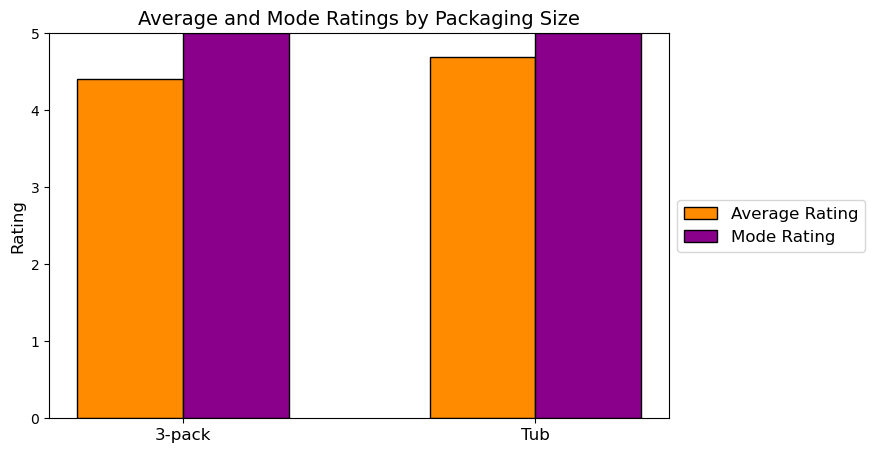

In [306]:
# 2. are there clear preferences for packaging? starchaser vs sunlover

def extract_pack_size(name):
    name = str(name).lower()
    
    # 1. Match '3x100ml' format
    match1 = re.search(r'(\d+)\s*x\s*\d+\s*ml', name)
    if match1:
        return int(match1.group(1))
    
    # 2. Match explicit 'pack' format
    match2 = re.search(r'(\d+)\s*pack', name)
    if match2:
        return int(match2.group(1))
    
    # 3. Match number before 'mini' or 'ice cream' for things like "6 Mini Double Caramel..."
    match3 = re.search(r'\b(\d+)\b.*?(?:mini|ice cream)s?', name, flags = re.IGNORECASE)
    if match3:
        return int(match3.group(1))
    
    # 4. Single tubs (with ml but no pack info)
    if 'tub' in name or re.search(r'\b\d+\s*ml\b', name):
        return 'Tub'
    
    return np.nan

ss_pack_data = sunrise_sunset.copy()
ss_pack_data['pack_size'] = ss_pack_data['product_name']. apply(extract_pack_size)
ss_pack_data = ss_pack_data[ss_pack_data['pack_size'].isin([3,4,6,12, 'Tub'])].copy()
ss_pack_summary = ss_pack_data.groupby('pack_size')['review_star_rating'].agg(
    mean_rating = 'mean', 
    mode_rating = lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()
print(ss_pack_summary, '\n')

x = np.arange(len(ss_pack_summary['pack_size']))
width = 0.3

plt.figure(figsize = (8,5))
plt.bar([i - width / 2 for i in x], ss_pack_summary['mean_rating'], width = width, color = 'darkorange', edgecolor = 'black', label = 'Average Rating')
plt.bar([i + width / 2 for i in x], ss_pack_summary['mode_rating'], width = width, color = 'darkmagenta', edgecolor = 'black', label = 'Mode Rating')
plt.xticks(x, [f"{p}-pack" if isinstance(p, (int, np.integer)) else str(p)
              for p in ss_pack_summary['pack_size']], fontsize = 12)
plt.ylabel('Rating', fontsize = 12)
plt.ylim(0,5)
plt.title('Average and Mode Ratings by Packaging Size', fontsize = 14)
plt.legend(fontsize = 12, loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.savefig('packaging_ss.png', dpi = 300, bbox_inches = 'tight')
plt.show()



  vegan_group  mean_rating  mode_rating
0   Non-Vegan     4.444079            5
1       Vegan     4.526524            5 



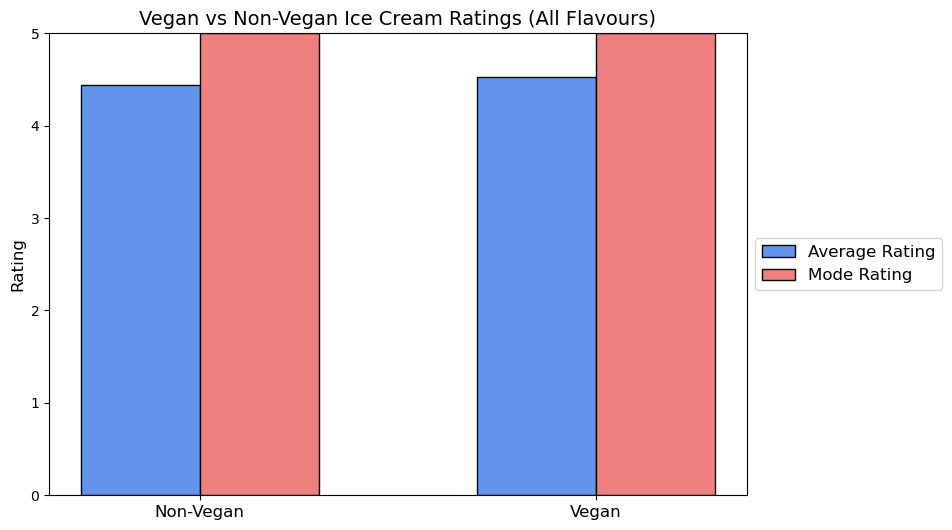

In [301]:
# 3. vegan or no vegan? for all flavours

data['vegan_group'] = data['product_name'].str.contains('vegan', case = False, na = False)
data['vegan_group'] = data['vegan_group'].apply(lambda x: 'Vegan' if x else 'Non-Vegan')

vegan_summary = data.groupby('vegan_group')['review_star_rating'].agg(mean_rating = 'mean', mode_rating = lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()
print(vegan_summary, '\n')

x = np.arange(len(vegan_summary))
width = 0.3

plt.figure(figsize = (9,6))
plt.bar(x - width / 2, vegan_summary['mean_rating'], width = width, color = 'cornflowerblue', edgecolor = 'black', label = 'Average Rating')
plt.bar(x + width / 2, vegan_summary['mode_rating'], width = width, color = 'lightcoral', edgecolor = 'black', label = 'Mode Rating')
plt.xticks(x, vegan_summary['vegan_group'], fontsize = 12)
plt.ylabel('Rating', fontsize = 12)
plt.ylim(0,5)
plt.title('Vegan vs Non-Vegan Ice Cream Ratings (All Flavours)', fontsize = 14)
plt.legend(fontsize = 12, loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.savefig('vegan_vs_nonvegan.png', dpi = 300, bbox_inches = 'tight')
plt.show()

